# MNIST with Estimator API (LinearRegression)

## most of the code taken from the course: Complete Guide to TensorFlow for Deep Learning with Python

##### first get the MNIST data in the csv format (taken from https://pjreddie.com/projects/mnist-in-csv/ ). But this file has problems with the column names, so you need to edit the file in excel (manualy change column names to : label, pix0, pix1, ... , pix678)

###### Please note that, the conversion to csv code in the website is "not" working

##### steps vs num_epochs in tensorflow, https://stackoverflow.com/questions/42816124/steps-vs-num-epochs-in-tensorflow-getting-started-tutorial

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
mnist_train = pd.read_csv('mnist_train_modified_in_excel.csv')
mnist_test = pd.read_csv('mnist_test_modified_in_excel.csv')

In [2]:
mnist_test.head() # checking the test data

,label,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,...,pix774,pix775,pix776,pix777,pix778,pix779,pix780,pix781,pix782,pix783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
mnist_train.head() # checking the training data

,label,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,...,pix774,pix775,pix776,pix777,pix778,pix779,pix780,pix781,pix782,pix783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train=mnist_train.drop('label', axis=1)
x_train = x_train.apply(lambda x: x/255.) # normalizing the 8 bit pixel values
x_train.iloc[0].max() #checking the max value in row 1

1.0

In [5]:
x_test=mnist_test.drop('label', axis=1)
x_test = x_test.apply(lambda x: x/255.) # normalizing the 8 bit pixel values
x_test.iloc[0].max() #checking the max value in row 1

1.0

In [6]:
y_train=mnist_train['label']
y_test=mnist_test['label']
# now x_train, x_test, y_train, y_test are all ready

#### checking a random image

this is a: 9


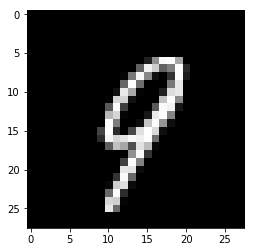

In [31]:
single_image=x_train.iloc[22].values.reshape(28,28)
plt.imshow(single_image, cmap="gist_gray")
print("this is a: ", end="")
print(y_train.iloc[22])

In [7]:
feat_col_names=list(x_train)
feat_cols=[]
for name in feat_col_names:
    feat_cols.append(tf.feature_column.numeric_column(name))

feat_cols
# creating the feature columns, but this doest seem like an efficient solution..

[_NumericColumn(key='pix0', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='pix1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='pix2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='pix3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='pix4', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='pix5', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='pix6', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='pix7', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='pix8', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='pix9', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericC

In [8]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=2,shuffle=True)

In [9]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=10)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_session_config': None, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_model_dir': '/tmp/tmp8kt0ie2x'}


In [10]:
model.train(input_fn=input_func,steps=2000) # training time

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp8kt0ie2x/model.ckpt.
INFO:tensorflow:loss = 23.0259, step = 1
INFO:tensorflow:global_step/sec: 20.7741
INFO:tensorflow:loss = 5.41633, step = 101 (4.897 sec)
INFO:tensorflow:global_step/sec: 7.25115
INFO:tensorflow:loss = 0.162853, step = 201 (13.795 sec)
INFO:tensorflow:global_step/sec: 7.33864
INFO:tensorflow:loss = 4.88, step = 301 (13.581 sec)
INFO:tensorflow:global_step/sec: 6.98026
INFO:tensorflow:loss = 0.249556, step = 401 (14.347 sec)
INFO:tensorflow:global_step/sec: 6.98646
INFO:tensorflow:loss = 0.387407, step = 501 (14.314 sec)
INFO:tensorflow:global_step/sec: 6.25748
INFO:tensorflow:loss = 1.51617, step = 601 (15.986 sec)
INFO:tensorflow:global_step/sec: 7.01264
INFO:tensorflow:loss = 0.916066, step = 701 (14.245 sec)
INFO:tensorflow:global_step/sec: 7.26857
INFO:tensorflow:loss = 1.89847, step = 801 (13.731 sec)
INFO:tensorflow:global_step/sec: 7.34715
INFO:tensorflow:loss = 

In [14]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=x_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [15]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-07-19-09:37:33
INFO:tensorflow:Restoring parameters from /tmp/tmp8kt0ie2x/model.ckpt-2000
INFO:tensorflow:Finished evaluation at 2018-07-19-09:39:24
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.9047, average_loss = 0.362966, global_step = 2000, loss = 3.62966
